In [5]:
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv('train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [88]:
col = []
for li in df.columns:
    col.append(li)
col.remove('price_range')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=42)

In [9]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
968,1923,0,0.5,1,7,0,46,0.5,191,1,10,767,1759,1489,10,9,3,1,1,1
240,633,1,2.2,0,0,1,49,0.1,139,8,1,529,1009,3560,11,1,16,1,1,1
819,1236,0,0.9,1,2,1,57,0.1,188,1,14,517,809,1406,14,12,20,1,0,1
692,781,0,1.1,0,2,0,38,0.4,198,5,7,304,1674,3508,13,8,5,0,0,1
420,1456,1,0.5,1,7,0,7,0.4,105,5,12,823,1104,1587,6,5,20,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1975,1,1.9,1,2,0,31,0.9,151,1,17,775,1607,3022,13,5,19,0,0,1
1294,589,1,0.5,0,1,1,59,0.7,146,8,4,759,1858,362,16,10,6,1,1,1
860,1829,1,0.5,0,0,1,15,0.4,160,5,7,729,1267,2080,16,11,12,1,0,1
1459,1927,0,0.9,1,3,0,11,0.4,190,8,12,491,1506,2916,16,11,18,0,1,1


In [10]:
y_train

968     1
240     2
819     0
692     3
420     1
       ..
1130    3
1294    0
860     2
1459    3
1126    1
Name: price_range, Length: 1600, dtype: int64

In [11]:
print(X_train.shape,y_train.shape)

(1600, 20) (1600,)


In [12]:
print(X_test.shape,y_test.shape)

(400, 20) (400,)


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from warnings import filterwarnings
filterwarnings('ignore')

In [25]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
logistic_regression = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=8)
de=DecisionTreeClassifier()

### voting soft

In [36]:
voting_model = VotingClassifier(estimators=[ ('LogisticRegression', logistic_regression), ('KNN', knn),('DecisionTreeClassifier',de)], 
                                voting='soft')
voting_model.fit(X_train, y_train)
pred = voting_model.predict(X_test)
print('보팅 분류기의 정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))
# 개별 모델의 학습/예측/평가
classifiers = [logistic_regression, knn, de]
x_voting_soft = []
y_voting_soft = []
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))
    x_voting_soft.append(accuracy_score(y_test, pred))
    y_voting_soft.append(class_name)

보팅 분류기의 정확도:  0.8625
LogisticRegression 정확도: 0.6325
KNeighborsClassifier 정확도: 0.9400
DecisionTreeClassifier 정확도: 0.8275


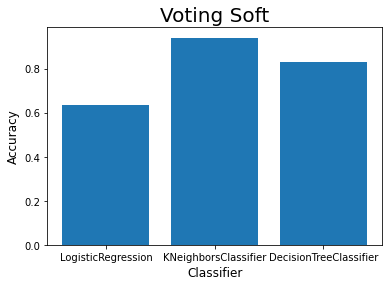

In [48]:
x = np.arange(3)
plt.title('Voting Soft', fontsize=20)
plt.xlabel('Classifier', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.bar(x, x_voting_soft)
plt.xticks(x, y_voting_soft)
plt.show()

### voting hard

In [46]:
voting_model = VotingClassifier(estimators=[ ('LogisticRegression', logistic_regression), ('KNN', knn),('DecisionTreeClassifier',de)], 
                                voting='hard')
voting_model.fit(X_train, y_train)
pred = voting_model.predict(X_test)
print('보팅 분류기의 정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))
# 개별 모델의 학습/예측/평가
classifiers = [logistic_regression, knn, de]
x_voting_hard = []
y_voting_hard = []
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))
    x_voting_hard.append(accuracy_score(y_test, pred))
    y_voting_hard.append(class_name)

보팅 분류기의 정확도:  0.8950
LogisticRegression 정확도: 0.6325
KNeighborsClassifier 정확도: 0.9400
DecisionTreeClassifier 정확도: 0.8250


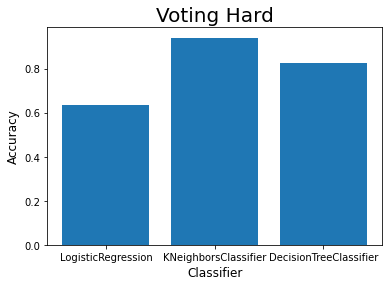

In [49]:
x = np.arange(3)
plt.title('Voting Hard', fontsize=20)
plt.xlabel('Classifier', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.bar(x, x_voting_hard)
plt.xticks(x, y_voting_hard)
plt.show()

In [51]:
import seaborn as sns

In [69]:
voting_accuracy = x_voting_soft + x_voting_hard
voting_classifier = y_voting_soft + y_voting_hard
cls = ['soft', 'soft', 'soft', 'hard', 'hard', 'hard']
df1 = pd.DataFrame({'Accuracy':voting_accuracy, 'Classifier':voting_classifier, 'cls':cls})
df1

,Accuracy,Classifier,cls
0,0.6325,LogisticRegression,soft
1,0.9400,KNeighborsClassifier,soft
2,0.8275,DecisionTreeClassifier,soft
3,0.6325,LogisticRegression,hard
4,0.9400,KNeighborsClassifier,hard
5,0.8250,DecisionTreeClassifier,hard


<AxesSubplot:xlabel='Classifier', ylabel='Accuracy'>

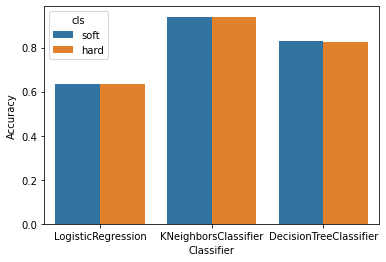

In [73]:
sns.barplot(data=df1, x='Classifier', y='Accuracy', hue='cls')

### 랜덤 포레스트 훈련

In [17]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

In [100]:
scores_li = []

In [101]:
rf = RandomForestClassifier (n_jobs=-1 ,random_state=42)
scores = cross_validate(rf ,X_train , y_train,
                       return_train_score=True ,n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.869375


In [102]:
scores_li.append(scores['test_score'])

In [19]:
rf.fit(X_train,y_train)
print(rf.feature_importances_)

[0.07479623 0.00659466 0.02905768 0.00642978 0.02451429 0.00563382
 0.03792802 0.02413367 0.04143425 0.02397791 0.0307449  0.05853758
 0.05672197 0.47096225 0.02844735 0.02813431 0.03244095 0.00684051
 0.0063519  0.00631797]


In [20]:
rf= RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(X_train,y_train)
print(rf.oob_score_)

0.859375


#### 부품(컬럼) 에 대한 중요도

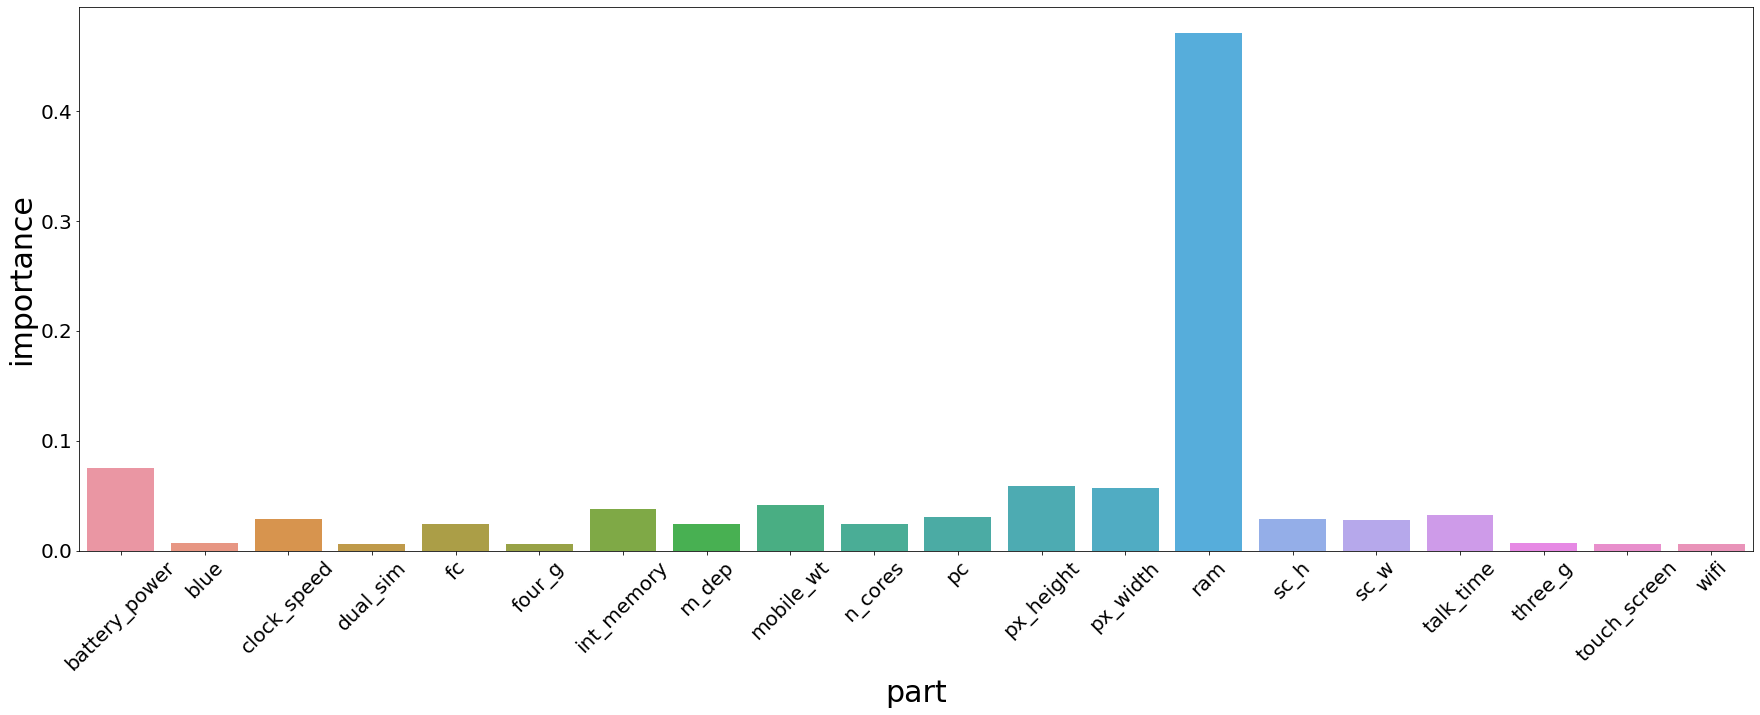

In [98]:
df2 = pd.DataFrame({'part':col, 'importance':rf.feature_importances_})
plt.figure(figsize=(30, 10))
df2_sns = sns.barplot(data=df2, x='part', y='importance')
df2_sns.set_xlabel('part', fontsize=30)
df2_sns.set_ylabel('importance', fontsize=30)
df2_sns.tick_params(labelsize=20)
plt.xticks(rotation=45)
plt.show()

### XGBoost vs LightGBM

In [21]:
from xgboost import XGBClassifier

In [103]:
xgb = XGBClassifier(tree_method='hist' ,random_state=42)
scores =cross_validate(xgb,X_train,y_train,return_train_score=True,n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

1.0 0.9043749999999999


In [104]:
scores_li.append(scores['test_score'])

In [105]:
from lightgbm import LGBMClassifier

In [106]:
lgb=LGBMClassifier(random_state=42)
scores =cross_validate(lgb,X_train,y_train,return_train_score=True,n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

1.0 0.9018749999999999


In [107]:
scores_li.append(scores['test_score'])

In [108]:
scores_li

[array([0.88125 , 0.884375, 0.88125 , 0.85    , 0.85    ]),
 array([0.9     , 0.9125  , 0.890625, 0.9125  , 0.90625 ]),
 array([0.91875 , 0.915625, 0.890625, 0.8875  , 0.896875])]

In [112]:
rf_score = scores_li[0]
xgb_score = scores_li[1]
lgb_score = scores_li[2]

In [132]:
num = np.arange(1,6)
num = np.repeat(num, 3)
num
cls_list = ['RandomForest','XGBoost','LightGBM']*5
cls_list

['RandomForest',
 'XGBoost',
 'LightGBM',
 'RandomForest',
 'XGBoost',
 'LightGBM',
 'RandomForest',
 'XGBoost',
 'LightGBM',
 'RandomForest',
 'XGBoost',
 'LightGBM',
 'RandomForest',
 'XGBoost',
 'LightGBM']

In [137]:
rf_score_1 = rf_score[0]
rf_score_2 = rf_score[1]
rf_score_3 = rf_score[2]
rf_score_4 = rf_score[3]
rf_score_5 = rf_score[4]
xgb_score_1 = xgb_score[0]
xgb_score_2 = xgb_score[1]
xgb_score_3 = xgb_score[2]
xgb_score_4 = xgb_score[3]
xgb_score_5 = xgb_score[4]
lgb_score_1 = lgb_score[0]
lgb_score_2 = lgb_score[1]
lgb_score_3 = lgb_score[2]
lgb_score_4 = lgb_score[3]
lgb_score_5 = lgb_score[4]
cls_score = [rf_score_1,rf_score_2,rf_score_3,rf_score_4,rf_score_5,xgb_score_1,xgb_score_2,xgb_score_3,xgb_score_4,xgb_score_5,lgb_score_1,lgb_score_2,lgb_score_3,lgb_score_4,lgb_score_5]
cls_score

[0.88125,
 0.884375,
 0.88125,
 0.85,
 0.85,
 0.9,
 0.9125,
 0.890625,
 0.9125,
 0.90625,
 0.91875,
 0.915625,
 0.890625,
 0.8875,
 0.896875]

In [138]:
cls_list = ['RandomForest','XGBoost','LightGBM']*5
num = np.arange(1,6)
num = np.repeat(num, 3)
df3 = pd.DataFrame({'Classifier':cls_list,'Score':cls_score, 'count':num})
df3

,Classifier,Score,count
0,RandomForest,0.881250,1
1,XGBoost,0.884375,1
2,LightGBM,0.881250,1
3,RandomForest,0.850000,2
4,XGBoost,0.850000,2
5,LightGBM,0.900000,2
6,RandomForest,0.912500,3
7,XGBoost,0.890625,3
8,LightGBM,0.912500,3
9,RandomForest,0.906250,4


#### RandomForest, XGBoost, LightGBM 시도별 점수

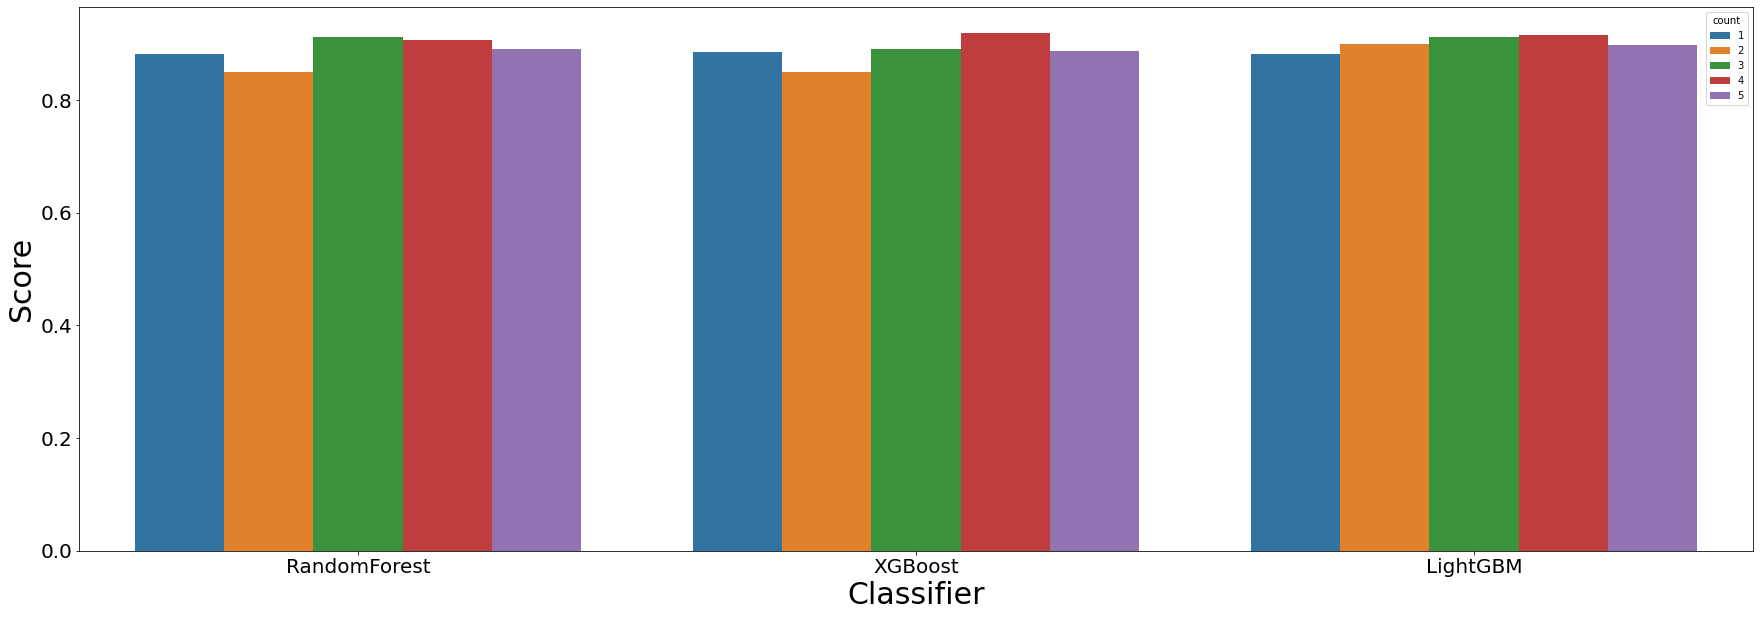

In [140]:
plt.figure(figsize=(30, 10))
df2_sns = sns.barplot(data=df3, x='Classifier', y='Score', hue='count')
df2_sns.set_xlabel('Classifier', fontsize=30)
df2_sns.set_ylabel('Score', fontsize=30)
df2_sns.tick_params(labelsize=20)
plt.show()